# Business Consultancy Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sma
import klib

In [4]:
heart = pd.read_csv('heart.csv')
heart.head(15)

,Age,Sex,Chest Pain,Resting BP,Serum Cholesterol,Fasting Blood Sugar,Resting EKG,Max. Heart Rate,Exercise Induced Angina,Oldpeak,Slope of Peak,Major Vessels Colored,Thal,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,2
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,2
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,2
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,2


In [186]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest Pain               270 non-null    int64  
 3   Resting BP               270 non-null    int64  
 4   Serum Cholesterol        270 non-null    int64  
 5   Fasting Blood Sugar      270 non-null    int64  
 6   Resting EKG              270 non-null    int64  
 7   Max. Heart Rate          270 non-null    int64  
 8   Exercise Induced Angina  270 non-null    int64  
 9   Oldpeak                  270 non-null    float64
 10  Slope of Peak            270 non-null    int64  
 11  Major Vessels Colored    270 non-null    int64  
 12  Thal                     270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [189]:
heart.nunique()

Age                         41
Sex                          2
Chest Pain                   4
Resting BP                  47
Serum Cholesterol          144
Fasting Blood Sugar          2
Resting EKG                  3
Max. Heart Rate             90
Exercise Induced Angina      2
Oldpeak                     39
Slope of Peak                3
Major Vessels Colored        4
Thal                         3
Heart Disease                2
dtype: int64

In [48]:
#heart['Thal'] = heart['Thal'].astype('category')

In [49]:
#heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      270 non-null    int64   
 1   Sex                      270 non-null    int64   
 2   Chest Pain               270 non-null    int64   
 3   Resting BP               270 non-null    int64   
 4   Serum Cholesterol        270 non-null    int64   
 5   Fasting Blood Sugar      270 non-null    int64   
 6   Resting EKG              270 non-null    int64   
 7   Max. Heart Rate          270 non-null    int64   
 8   Exercise Induced Angina  270 non-null    int64   
 9   Oldpeak                  270 non-null    float64 
 10  Slope of Peak            270 non-null    int64   
 11  Major Vessels Colored    270 non-null    int64   
 12  Thal                     270 non-null    category
 13  Heart Disease            270 non-null    int64   
dtypes: categor

In [125]:
heart.loc[:,['Age', 'Resting BP', 'Serum Cholesterol', 'Max. Heart Rate', 
             'Oldpeak', 'Major Vessels Colored']].describe().round(decimals=2)

,Age,Resting BP,Serum Cholesterol,Max. Heart Rate,Oldpeak,Major Vessels Colored
count,270.00,270.00,270.00,270.00,270.00,270.00
mean,54.43,131.34,249.66,149.68,1.05,0.67
std,9.11,17.86,51.69,23.17,1.15,0.94
min,29.00,94.00,126.00,71.00,0.00,0.00
25%,48.00,120.00,213.00,133.00,0.00,0.00
50%,55.00,130.00,245.00,153.50,0.80,0.00
75%,61.00,140.00,280.00,166.00,1.60,1.00
max,77.00,200.00,564.00,202.00,6.20,3.00


In [126]:
#histograms - numerical
#bar graph - categorical

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Resting BP'}>],
       [<AxesSubplot: title={'center': 'Serum Cholesterol'}>,
        <AxesSubplot: title={'center': 'Max. Heart Rate'}>],
       [<AxesSubplot: title={'center': 'Oldpeak'}>, <AxesSubplot: >]],
      dtype=object)

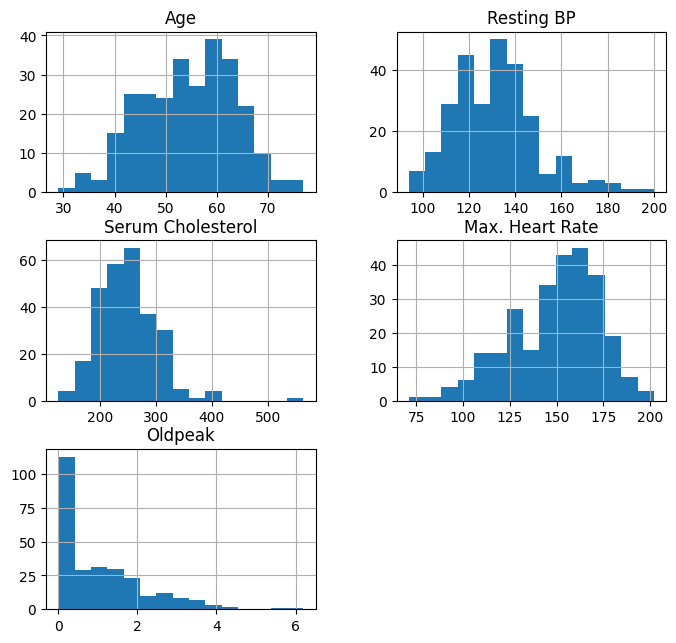

In [127]:
heart.loc[:,['Age', 'Resting BP', 'Serum Cholesterol', 'Max. Heart Rate', 
             'Oldpeak']].hist(bins=15, figsize = (8,7.5))

In [128]:
sex_count = heart.Sex.value_counts()
chest_pain_count = heart['Chest Pain'].value_counts()
fasting_BS_count = heart['Fasting Blood Sugar'].value_counts()
resting_EKG_count = heart['Resting EKG'].value_counts()
exercise_induced_angina_count = heart['Exercise Induced Angina'].value_counts()
thal_count = heart.Thal.value_counts()
heart_disease_count = heart['Heart Disease'].value_counts()
print(sex_count)
print(chest_pain_count)
print(fasting_BS_count)
print(resting_EKG_count)
print(exercise_induced_angina_count)
print(thal_count)
print(heart_disease_count)

1    183
0     87
Name: Sex, dtype: int64
4    129
3     79
2     42
1     20
Name: Chest Pain, dtype: int64
0    230
1     40
Name: Fasting Blood Sugar, dtype: int64
2    137
0    131
1      2
Name: Resting EKG, dtype: int64
0    181
1     89
Name: Exercise Induced Angina, dtype: int64
3    152
7    104
6     14
Name: Thal, dtype: int64
1    150
2    120
Name: Heart Disease, dtype: int64


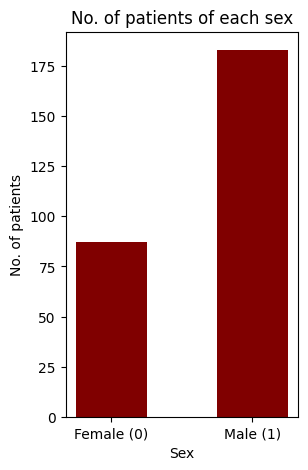

In [129]:
data = {'Female (0)':87, 'Male (1)':183}
sex = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (3, 5))
 
# creating the bar plot
bar1 = plt.bar(sex, values, color ='maroon',
        width = 0.5)
 
plt.xlabel("Sex")
plt.ylabel("No. of patients")
plt.title("No. of patients of each sex")
plt.show(bar1)

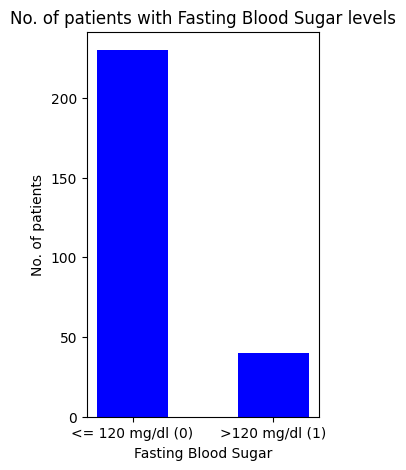

In [130]:
data2 = {'<= 120 mg/dl (0)':230, '>120 mg/dl (1)':40}
fasting_BS = list(data2.keys())
values2 = list(data2.values())
  
fig = plt.figure(figsize = (3, 5))
 
# creating the bar plot
bar2 = plt.bar(fasting_BS, values2, color ='blue',
        width = 0.5)
 
plt.xlabel("Fasting Blood Sugar")
plt.ylabel("No. of patients")
plt.title("No. of patients with Fasting Blood Sugar levels")
fig2 = plt.show(bar2)

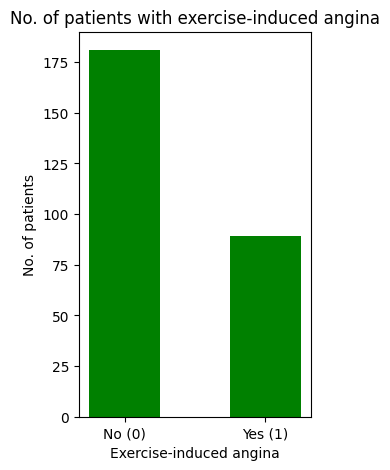

In [131]:
data3 = {'No (0)':181, 'Yes (1)':89}
angina = list(data3.keys())
values3 = list(data3.values())
  
fig = plt.figure(figsize = (3, 5))
 
# creating the bar plot
bar3 = plt.bar(angina, values3, color ='green',
        width = 0.5)
 
plt.xlabel("Exercise-induced angina")
plt.ylabel("No. of patients")
plt.title("No. of patients with exercise-induced angina")
plt.show(bar3)

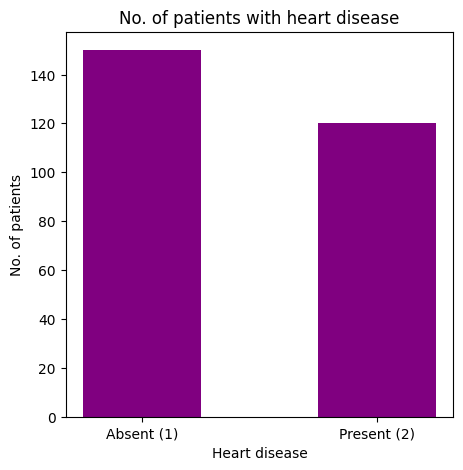

In [132]:
data4 = {'Absent (1)':150, 'Present (2)':120}
disease = list(data4.keys())
values4 = list(data4.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
bar4 = plt.bar(disease, values4, color ='purple',
        width = 0.5)
 
plt.xlabel("Heart disease")
plt.ylabel("No. of patients")
plt.title("No. of patients with heart disease")
plt.show(bar4)

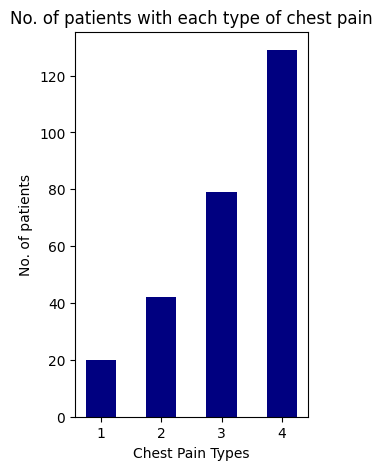

In [133]:
data5 = {'1':20, '2':42, '3':79, '4':129}
chest_pain = list(data5.keys())
values5 = list(data5.values())
  
fig = plt.figure(figsize = (3, 5))
 
# creating the bar plot
bar5 = plt.bar(chest_pain, values5, color ='navy',
        width = 0.5)
 
plt.xlabel("Chest Pain Types")
plt.ylabel("No. of patients")
plt.title("No. of patients with each type of chest pain")
plt.show(bar5)

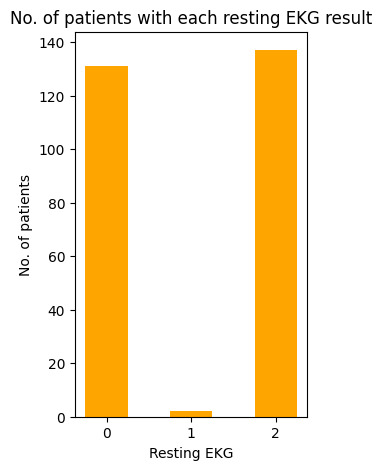

In [134]:
data6 = {'0':131, '1':2, '2':137}
resting_EKG = list(data6.keys())
values6 = list(data6.values())
  
fig = plt.figure(figsize = (3, 5))
 
# creating the bar plot
bar6 = plt.bar(resting_EKG, values6, color ='orange',
        width = 0.5)
 
plt.xlabel("Resting EKG")
plt.ylabel("No. of patients")
plt.title("No. of patients with each resting EKG result")
plt.show(bar6)

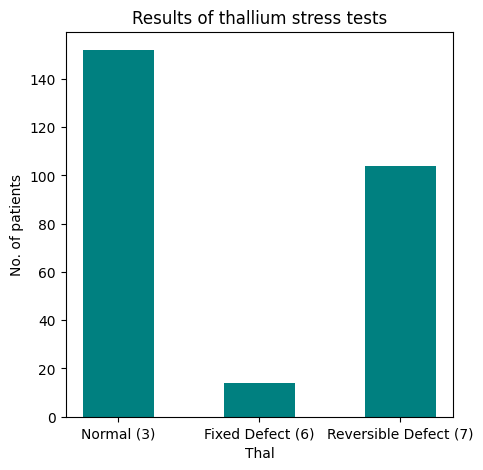

In [135]:
data7 = {'Normal (3)':152, 'Fixed Defect (6)':14, 'Reversible Defect (7)':104}
thal = list(data7.keys())
values7 = list(data7.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
bar7 = plt.bar(thal, values7, color ='teal',
        width = 0.5)
 
plt.xlabel("Thal")
plt.ylabel("No. of patients")
plt.title("Results of thallium stress tests")
plt.show(bar7)

In [136]:
heart.corr().round(decimals=3)

,Age,Sex,Chest Pain,Resting BP,Serum Cholesterol,Fasting Blood Sugar,Resting EKG,Max. Heart Rate,Exercise Induced Angina,Oldpeak,Slope of Peak,Major Vessels Colored,Thal,Heart Disease
Age,1.000,-0.094,0.097,0.273,0.220,0.123,0.128,-0.402,0.098,0.194,0.160,0.356,0.106,0.212
Sex,-0.094,1.000,0.035,-0.063,-0.202,0.042,0.039,-0.076,0.180,0.097,0.051,0.087,0.391,0.298
Chest Pain,0.097,0.035,1.000,-0.043,0.090,-0.099,0.074,-0.318,0.353,0.167,0.137,0.226,0.263,0.417
Resting BP,0.273,-0.063,-0.043,1.000,0.173,0.156,0.116,-0.039,0.083,0.223,0.142,0.086,0.132,0.155
Serum Cholesterol,0.220,-0.202,0.090,0.173,1.000,0.025,0.168,-0.019,0.078,0.028,-0.006,0.127,0.029,0.118
Fasting Blood Sugar,0.123,0.042,-0.099,0.156,0.025,1.000,0.053,0.022,-0.004,-0.026,0.044,0.124,0.049,-0.016
Resting EKG,0.128,0.039,0.074,0.116,0.168,0.053,1.000,-0.075,0.095,0.120,0.161,0.114,0.007,0.182
Max. Heart Rate,-0.402,-0.076,-0.318,-0.039,-0.019,0.022,-0.075,1.000,-0.381,-0.349,-0.387,-0.265,-0.253,-0.419
Exercise Induced Angina,0.098,0.180,0.353,0.083,0.078,-0.004,0.095,-0.381,1.000,0.275,0.256,0.153,0.321,0.419
Oldpeak,0.194,0.097,0.167,0.223,0.028,-0.026,0.120,-0.349,0.275,1.000,0.610,0.255,0.324,0.418


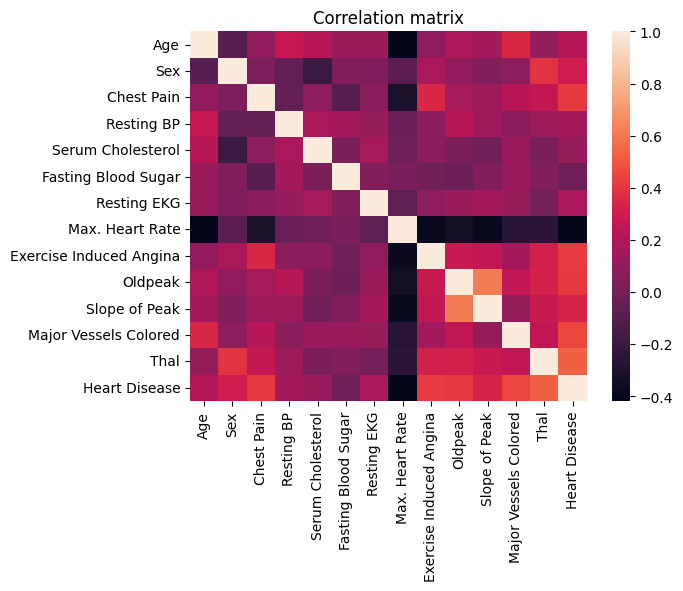

In [137]:
corr = heart[['Age',
              'Sex',
              'Chest Pain',
              'Resting BP',
              'Serum Cholesterol',
              'Fasting Blood Sugar',
              'Resting EKG',
              'Max. Heart Rate',
              'Exercise Induced Angina',
              'Oldpeak',
              'Slope of Peak',
              'Major Vessels Colored',
              'Thal',
              'Heart Disease']].corr()

sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns);
plt.title("Correlation matrix");

<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

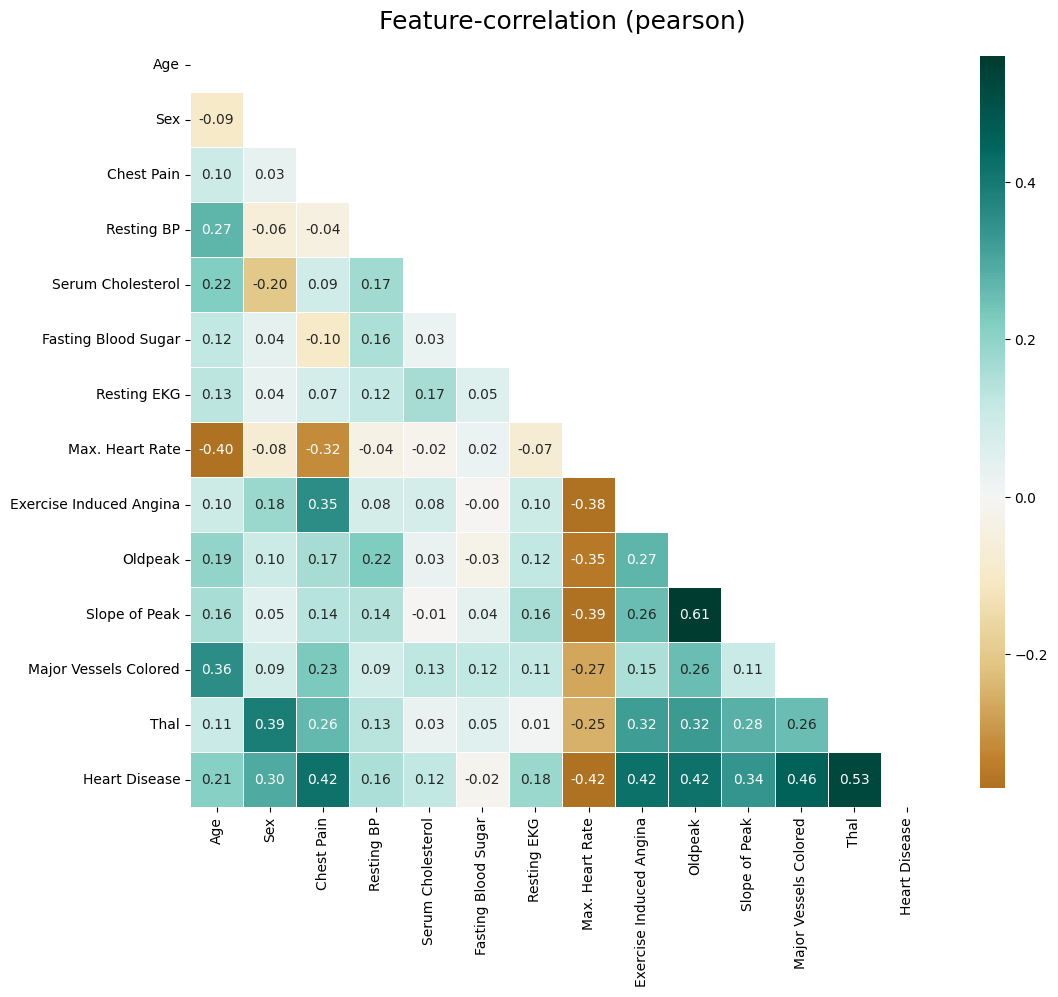

In [138]:
klib.corr_plot(heart)

<AxesSubplot: xlabel='Thal', ylabel='Density'>

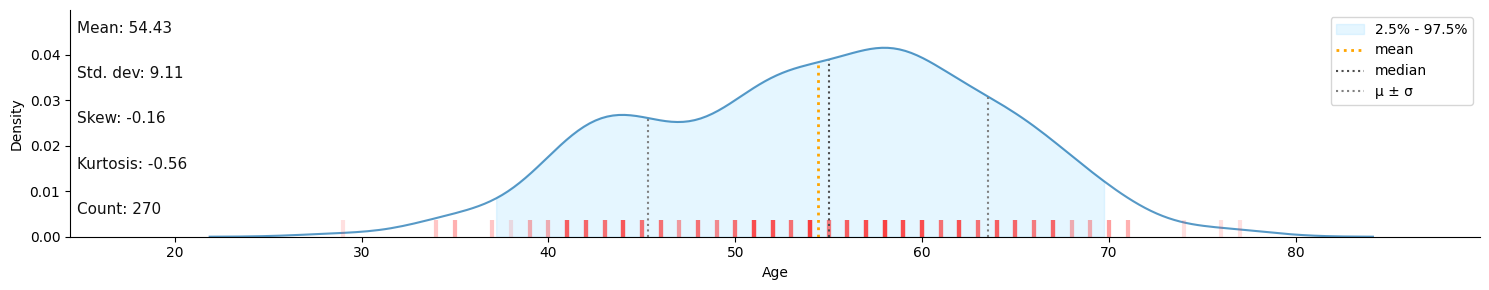

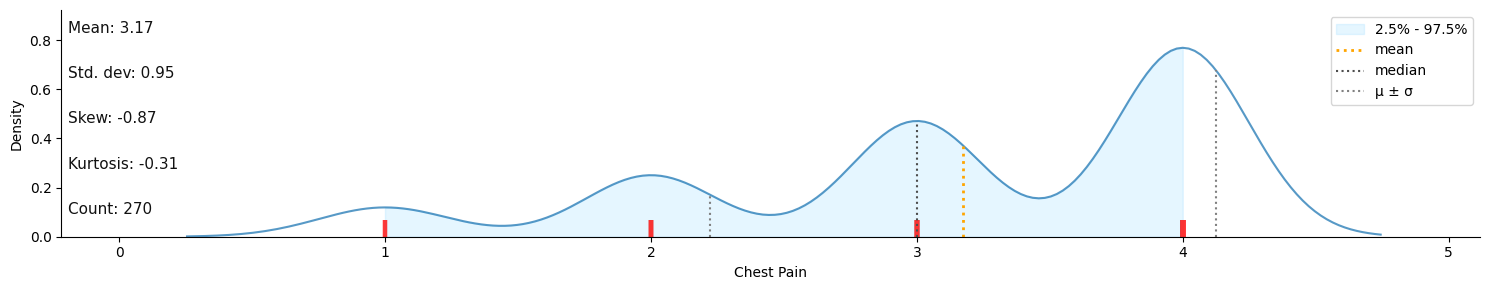

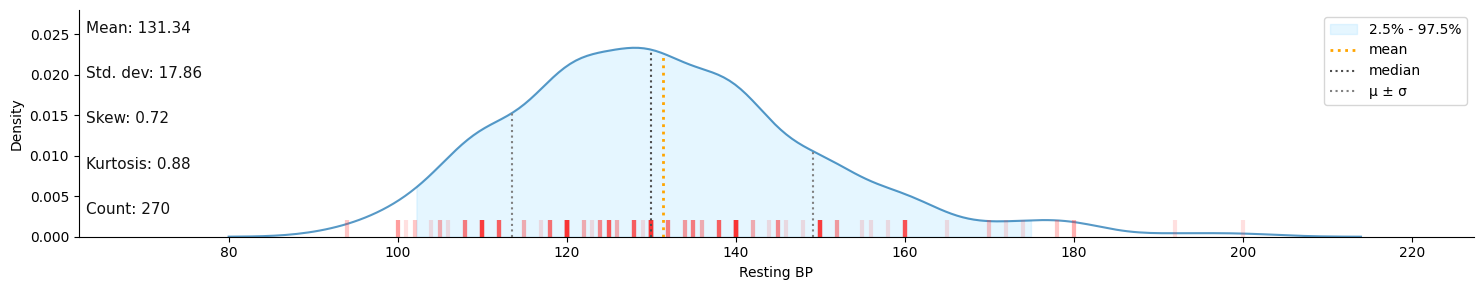

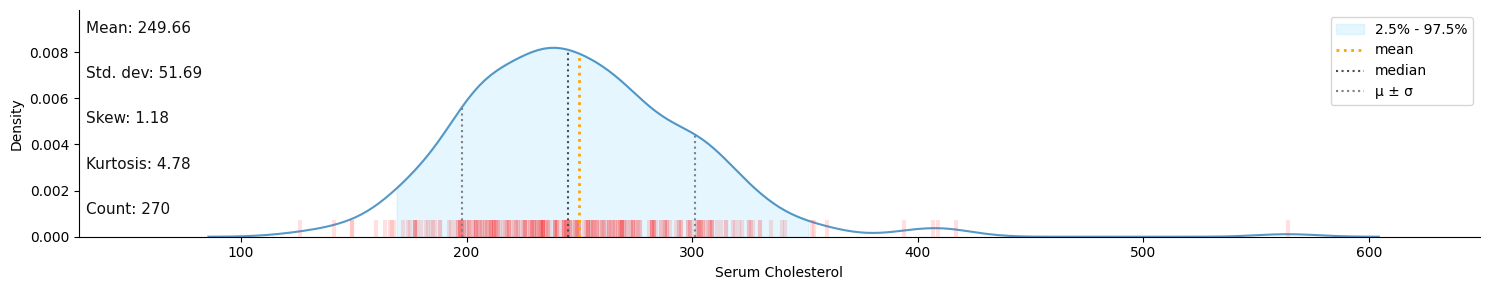

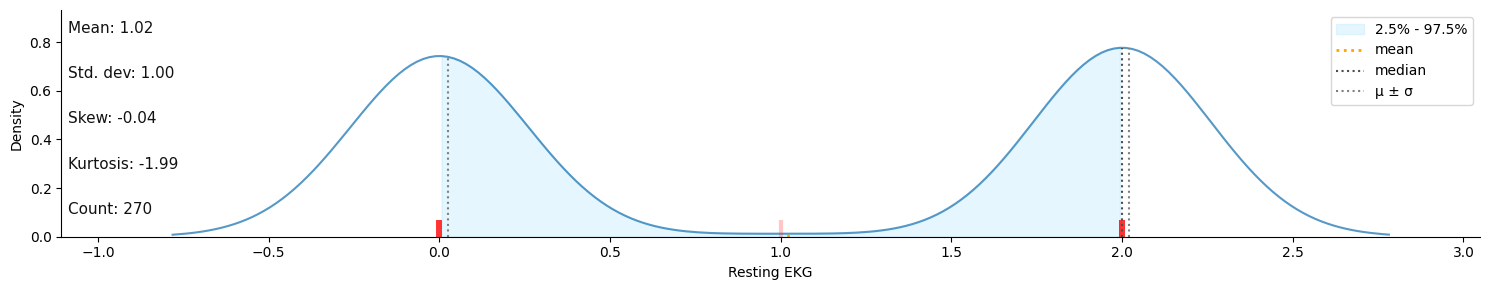

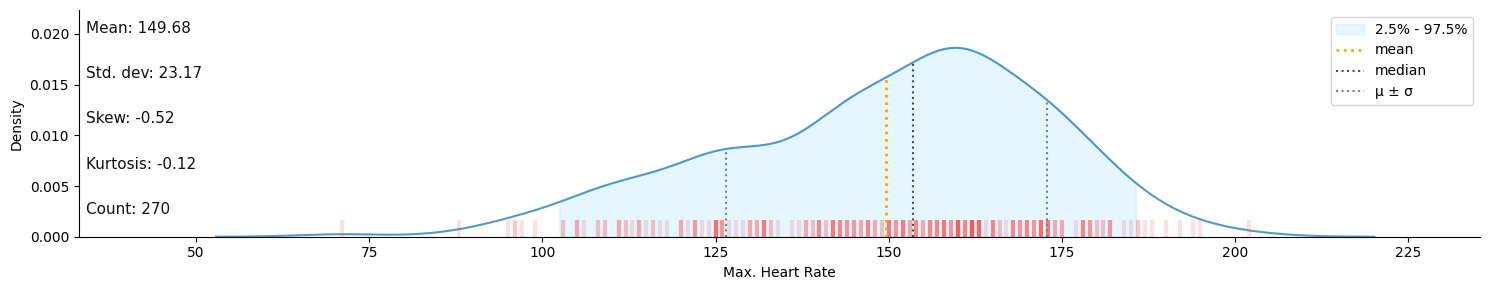

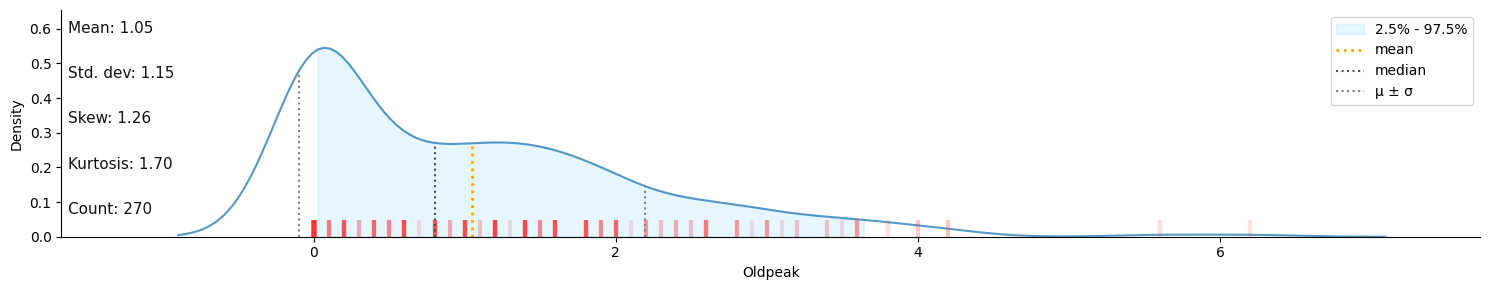

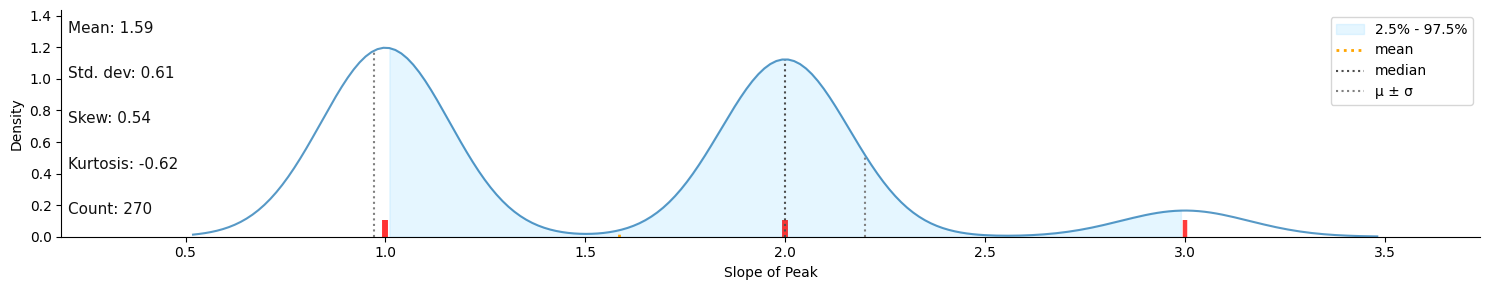

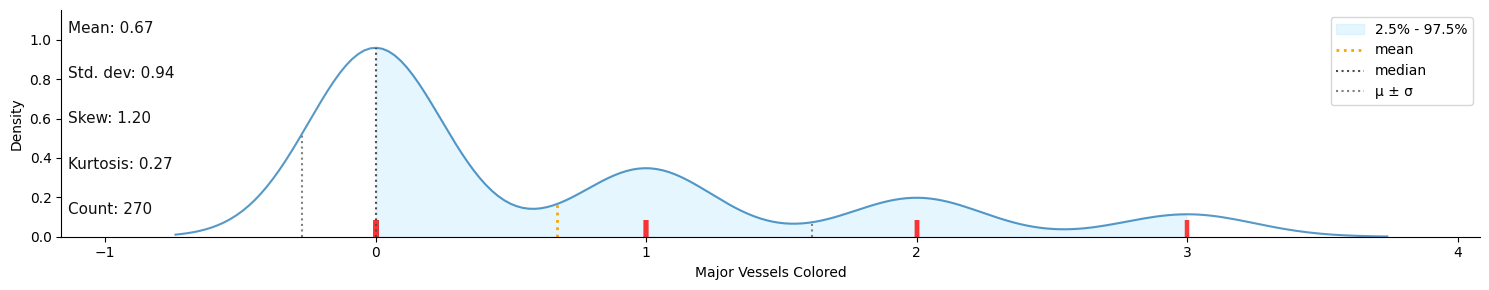

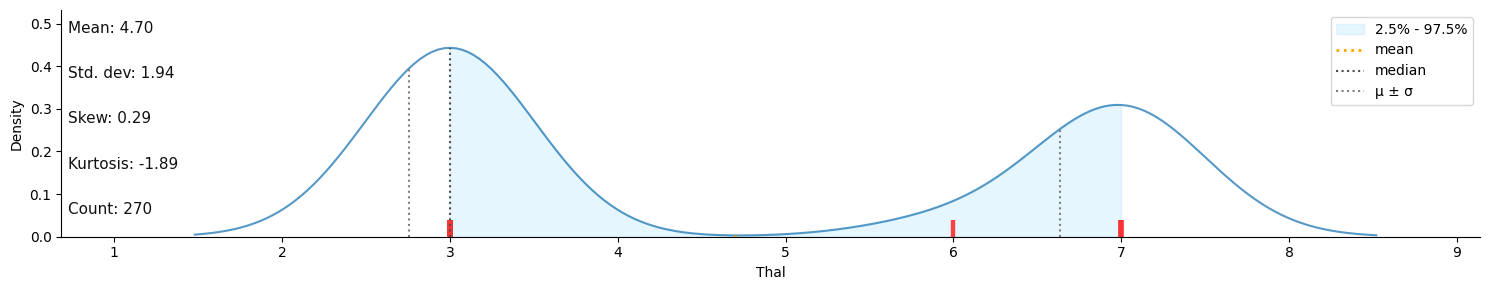

In [139]:
klib.dist_plot(heart)

In [140]:
#klib.cat_plot(heart)

<AxesSubplot: title={'center': 'Arrests'}, xlabel='Home Team', ylabel='Mean Arrests'>

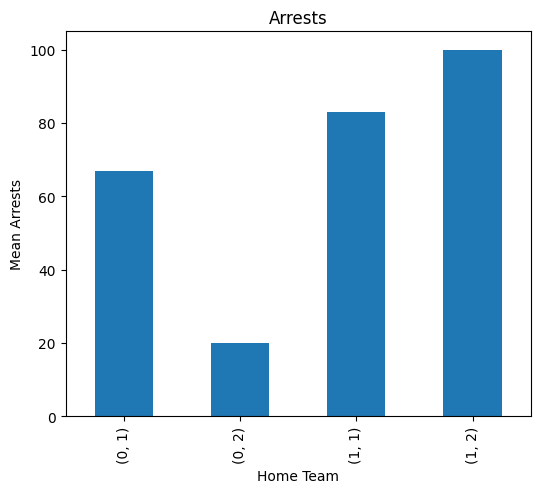

In [141]:
dfg = heart.groupby(['Sex','Heart Disease'])['Heart Disease'].count()

dfg.plot(kind='bar', title='Arrests', ylabel='Mean Arrests',
         xlabel='Home Team', figsize=(6, 5))

In [142]:
#sex_heart_count = heart.Sex.value_counts()
#chest_pain_count = heart['Chest Pain'].value_counts()
#fasting_BS_count = heart['Fasting Blood Sugar'].value_counts()
#resting_EKG_count = heart['Resting EKG'].value_counts()
#exercise_induced_angina_count = heart['Exercise Induced Angina'].value_counts()
#thal_count = heart.Thal.value_counts()
#heart_disease_count = heart['Heart Disease'].value_counts()
#print(sex_heart_count)
#print(chest_pain_count)
#print(fasting_BS_count)
#print(resting_EKG_count)
#print(exercise_induced_angina_count)
#print(thal_count)
#print(heart_disease_count)

df = heart.groupby(['Heart Disease','Sex'])['Heart Disease'].count()
print(df)

Heart Disease  Sex
1              0       67
               1       83
2              0       20
               1      100
Name: Heart Disease, dtype: int64


      Sex  Absent  Present
0  Female      67       20
1    Male      83      100


<AxesSubplot: title={'center': 'Heart Disease Distribution Among Sex'}, xlabel='Sex'>

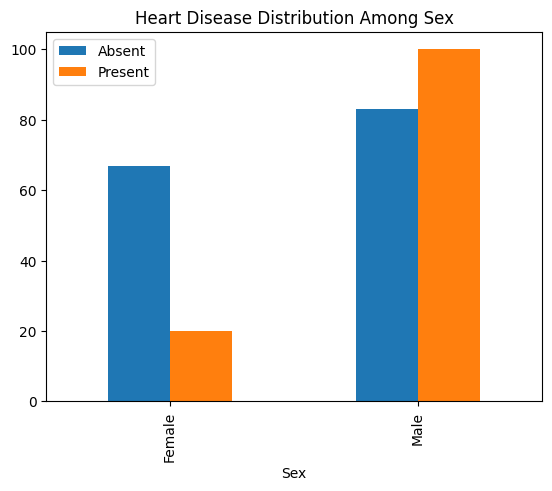

In [143]:
df = pd.DataFrame([['Female', 67, 20], ['Male', 83, 100]],
                  columns=['Sex', 'Absent', 'Present'])
print(df)


df.plot(x='Sex',
        kind='bar',
        stacked=False,
        title='Heart Disease Distribution Among Sex')

In [144]:
df1 = heart.groupby(['Heart Disease','Major Vessels Colored'])['Heart Disease'].count()
print(df1)

Heart Disease  Major Vessels Colored
1              0                        120
               1                         20
               2                          7
               3                          3
2              0                         40
               1                         38
               2                         26
               3                         16
Name: Heart Disease, dtype: int64


  # of Major Vessels Colored by Fluoroscopy  Absent  Present
0                                         0     120       40
1                                         1      20       38
2                                         2       7       26
3                                         3       3       16


<AxesSubplot: title={'center': 'Heart Disease Distribution for each # of Major Vessels Colored'}, xlabel='# of Major Vessels Colored by Fluoroscopy'>

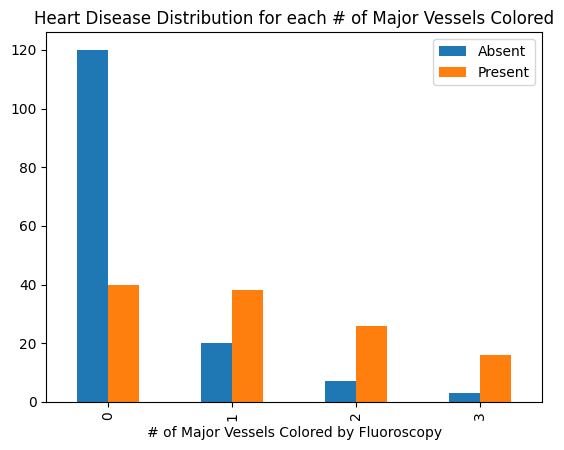

In [145]:
df2 = pd.DataFrame([['0', 120, 40], ['1', 20, 38], ['2', 7, 26], ['3', 3, 16]],
                  columns=['# of Major Vessels Colored by Fluoroscopy', 'Absent', 'Present'])
print(df2)


df2.plot(x='# of Major Vessels Colored by Fluoroscopy',
        kind='bar',
        stacked=False,
        title='Heart Disease Distribution for each # of Major Vessels Colored')

In [146]:
df3 = heart.groupby(['Heart Disease','Exercise Induced Angina'])['Heart Disease'].count()
print(df3)

Heart Disease  Exercise Induced Angina
1              0                          127
               1                           23
2              0                           54
               1                           66
Name: Heart Disease, dtype: int64


  Exercise Induced Angina  Absent  Present
0                      No     127       54
1                     Yes      23       66


<AxesSubplot: title={'center': 'Heart Disease Distribution for Exercise Induced Angina'}, xlabel='Exercise Induced Angina'>

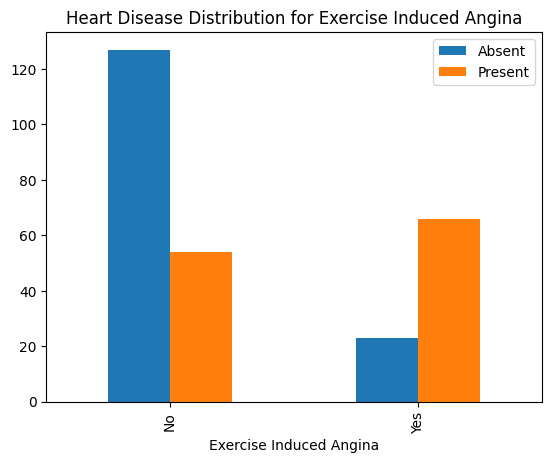

In [147]:
df4 = pd.DataFrame([['No', 127, 54], ['Yes', 23, 66]],
                  columns=['Exercise Induced Angina', 'Absent', 'Present'])
print(df4)


df4.plot(x='Exercise Induced Angina',
        kind='bar',
        stacked=False,
        title='Heart Disease Distribution for Exercise Induced Angina')

In [148]:
df5 = heart.groupby(['Heart Disease','Thal'])['Heart Disease'].count()
print(df5)

Heart Disease  Thal
1              3       119
               6         6
               7        25
2              3        33
               6         8
               7        79
Name: Heart Disease, dtype: int64


                Thal  Absent  Present
0             Normal     119       33
1       Fixed Defect       6        8
2  Reversible Defect      25       79


<AxesSubplot: title={'center': 'Heart Disease Distribution for Thallium Stress Test Results'}, xlabel='Thal'>

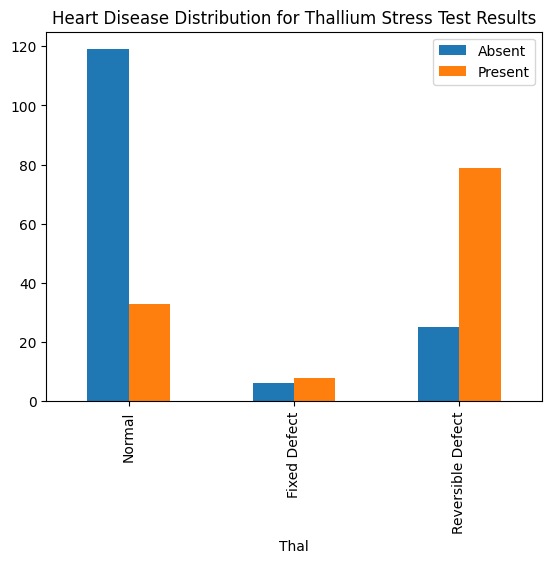

In [149]:
df6 = pd.DataFrame([['Normal', 119, 33], ['Fixed Defect', 6, 8], ['Reversible Defect', 25, 79]],
                  columns=['Thal', 'Absent', 'Present'])
print(df6)


df6.plot(x='Thal',
        kind='bar',
        stacked=False,
        title='Heart Disease Distribution for Thallium Stress Test Results')

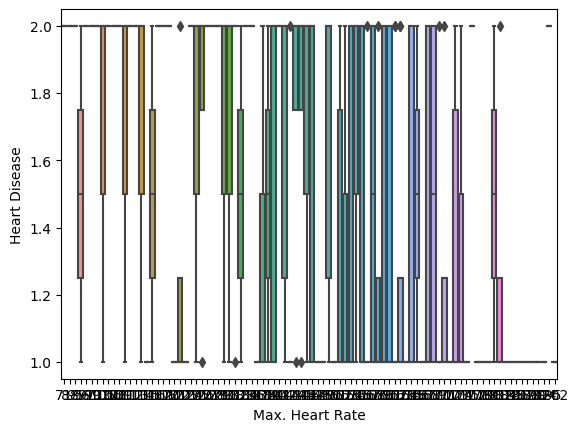

In [152]:
sns.boxplot( x="Max. Heart Rate", y='Heart Disease', data=heart)
plt.show()

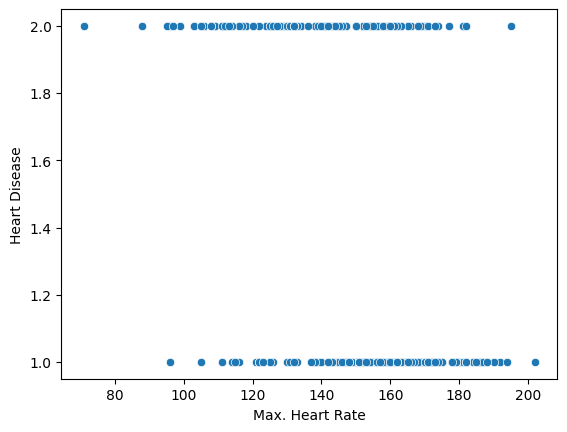

In [151]:
sns.scatterplot( x="Max. Heart Rate", y='Heart Disease', data=heart, )
plt.show()

In [157]:
heart['Heart Disease'] = heart['Heart Disease'].astype('object')

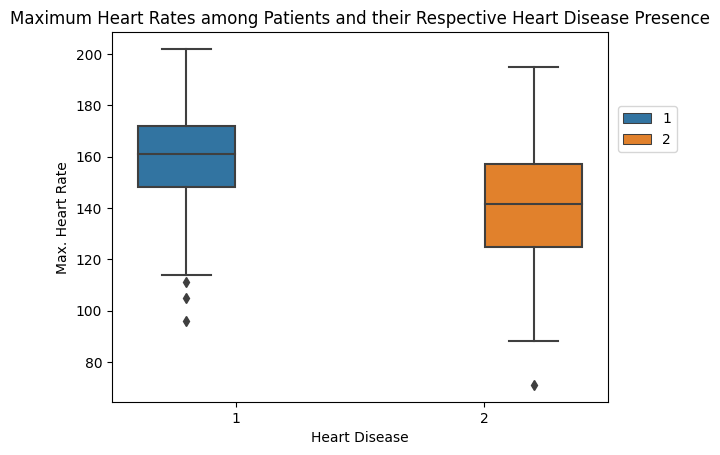

In [180]:
sns.boxplot( y="Max. Heart Rate", x='Heart Disease', data=heart, hue="Heart Disease"
           ).set_title('Maximum Heart Rates among Patients and their Respective Heart Disease Presence')
plt.legend(bbox_to_anchor=(1.02, 0.8), loc='upper left', borderaxespad=0)
plt.show()

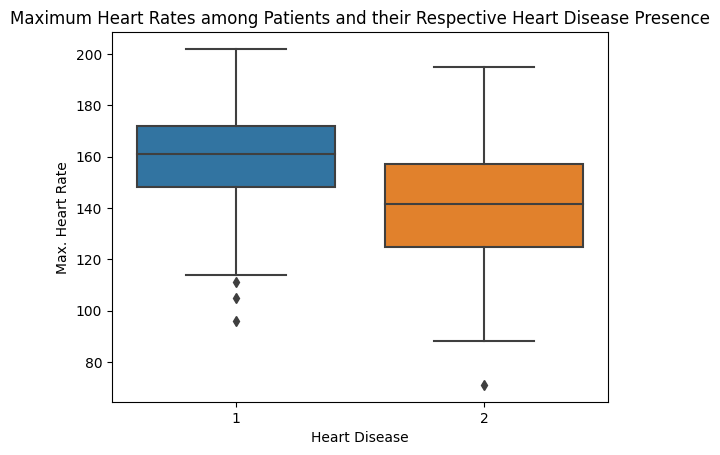

In [183]:
sns.boxplot( y="Max. Heart Rate", x='Heart Disease', data=heart, 
           ).set_title('Maximum Heart Rates among Patients and their Respective Heart Disease Presence')
plt.show()

In [162]:
df7 = heart.groupby(['Heart Disease','Fasting Blood Sugar'])['Heart Disease'].count()
print(df7)

Heart Disease  Fasting Blood Sugar
1              0                      127
               1                       23
2              0                      103
               1                       17
Name: Heart Disease, dtype: int64


  Fasting Blood Sugar  Absent  Present
0        <= 120 mg/dl     127       23
1         > 120 mg/dl     103       17


<AxesSubplot: title={'center': 'Heart Disease Distribution for Fasting Blood Sugar Levels'}, xlabel='Fasting Blood Sugar'>

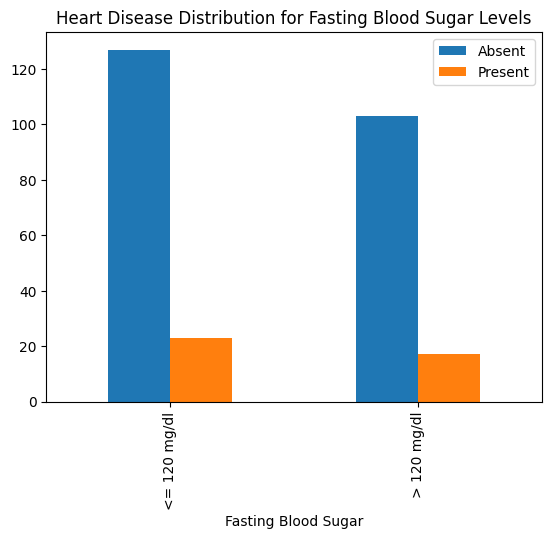

In [164]:
df8 = pd.DataFrame([['<= 120 mg/dl', 127, 23], ['> 120 mg/dl', 103, 17]],
                  columns=['Fasting Blood Sugar', 'Absent', 'Present'])
print(df8)


df8.plot(x='Fasting Blood Sugar',
        kind='bar',
        stacked=False,
        title='Heart Disease Distribution for Fasting Blood Sugar Levels')